<a href="https://colab.research.google.com/github/hilya09/phishing-detection/blob/main/train_model_eksperimen_1_Variabel_Prediktor_Kombinasi_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing URL Detection

## Modules dan Packages

In [ ]:
import gdown
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.stem import SnowballStemmer

import joblib
import pickle

#Download Dataset

##Dataset lama

In [ ]:
# Create the directory if it doesn't exist
os.makedirs('/content/dataset-phishing/', exist_ok=True)

In [ ]:
# Download the file
!wget -O /content/dataset-phishing/urldataset.zip https://github.com/hilya09/dataset/raw/main/urldataset.zip

--2024-05-06 08:13:01--  https://github.com/hilya09/dataset/raw/main/urldataset.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilya09/dataset/main/urldataset.zip [following]
--2024-05-06 08:13:02--  https://raw.githubusercontent.com/hilya09/dataset/main/urldataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11685834 (11M) [application/zip]
Saving to: ‘/content/dataset-phishing/urldataset.zip’

/content/dataset-ph 100%[===================>]  11.14M  33.8MB/s    in 0.3s    

2024-05-06 08:13:03 (33.8 MB/s) - ‘/content/dataset-phishing/urldataset.zip’ saved [11685834/11685834]



In [ ]:
# Extract the contents of the zip file
with zipfile.ZipFile('/content/dataset-phishing/urldataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train-model/phishing/')

In [ ]:
data = pd.read_csv("/content/train-model/phishing/urldataset.csv")

##Dataset UCI ML

In [ ]:
gdown.download_folder("https://drive.google.com/drive/folders/1B4N-h31TXwSIumPu0SJBYTQTQcmakwtX")

Retrieving folder contents


Processing file 130fxYjT4dOlaDd2Hd424Hk1EO8EQFdVB Detection.zip
Processing file 1RG81re2Pd1ujZFXZt8r5upWNaipXZ5Jv malicious_pish.zip
Processing file 1bwBqPpcrR06U-kTc18h4ZCGNQu1xJKCT phishing_site_urls.zip
Processing file 1bjbIFrWuMZu1RxDjcc3jCxYcR14qMHgo phiusiil+phishing+url+dataset.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=130fxYjT4dOlaDd2Hd424Hk1EO8EQFdVB
To: /content/dataset-phishing/Detection.zip
100%|██████████| 7.78k/7.78k [00:00<00:00, 10.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RG81re2Pd1ujZFXZt8r5upWNaipXZ5Jv
To: /content/dataset-phishing/malicious_pish.zip
100%|██████████| 17.7M/17.7M [00:00<00:00, 27.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bwBqPpcrR06U-kTc18h4ZCGNQu1xJKCT
To: /content/dataset-phishing/phishing_site_urls.zip
100%|██████████| 9.33M/9.33M [00:00<00:00, 157MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bjbIFrWuMZu1RxDjcc3jCxYcR14qMHgo
To: /content/dataset-phishing/phiusiil+phishing+url+dataset.zip
100%|██████████| 15.4M/15.4M [00:00<00:00, 154MB/s]
Download completed


['/content/dataset-phishing/Detection.zip',
 '/content/dataset-phishing/malicious_pish.zip',
 '/content/dataset-phishing/phishing_site_urls.zip',
 '/content/dataset-phishing/phiusiil+phishing+url+dataset.zip']

In [ ]:
with zipfile.ZipFile('/content/dataset-phishing/phiusiil+phishing+url+dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train-model/phishing/')

In [ ]:
data2 = pd.read_csv("/content/train-model/phishing/PhiUSIIL_Phishing_URL_Dataset.csv") #dari uci ML repository

## Exploratory Data Analysis (EDA)

##dataset 1

In [ ]:
data

,URL,label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
664204,https://en.wikipedia.org/wiki/Smith_%26_Wesson...,0
664205,http://www.thefreedictionary.com/tor,0
664206,http://www.dummies.com/education/math/geometry...,0
664207,http://www.vg247.com/2017/04/24/best-nintendo-...,0


In [ ]:
data= data.rename(columns={'label': 'Label'})

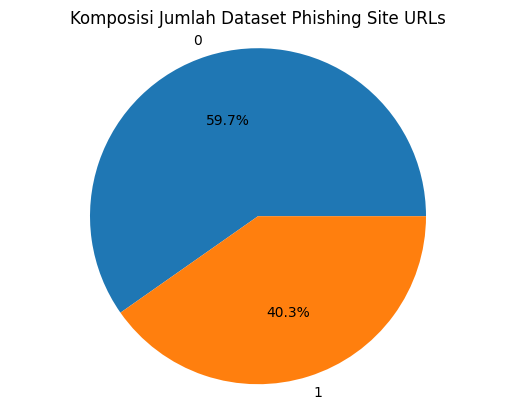

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
data['Label'].unique()

array([1, 0])

In [ ]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Bad\t\t:', data[data.Label == 1].shape[0], 'data')
print('-- [0] Good\t\t:', data[data.Label == 0].shape[0], 'data\n')

Total Jumlah url: 664209 data

terdiri dari (label):
-- [1] Bad		: 267443 data
-- [0] Good		: 396766 data



In [ ]:
data.duplicated().sum()

143

In [ ]:
data.drop(data[data.URL.duplicated() == True].index, axis = 0, inplace = True)
data.reset_index(drop=True)

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
617939,https://en.wikipedia.org/wiki/Smith_%26_Wesson...,0
617940,http://www.thefreedictionary.com/tor,0
617941,http://www.dummies.com/education/math/geometry...,0
617942,http://www.vg247.com/2017/04/24/best-nintendo-...,0


In [ ]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
data.URL.duplicated().sum()

0

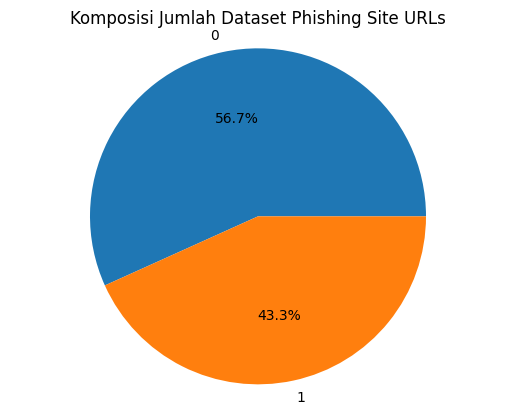

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
# Memilih hanya kolom 'url' dan 'label'
data1_new = data[['URL', 'Label']]

In [ ]:
data1_new

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
664204,https://en.wikipedia.org/wiki/Smith_%26_Wesson...,0
664205,http://www.thefreedictionary.com/tor,0
664206,http://www.dummies.com/education/math/geometry...,0
664207,http://www.vg247.com/2017/04/24/best-nintendo-...,0


##dataset2

In [ ]:
data2

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
data2= data2.rename(columns={'label': 'Label'})

In [ ]:
data2['Label'].unique()

array([1, 0])

In [ ]:
print('Total Jumlah url:', data2.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Good\t\t:', data2[data2.Label == 0].shape[0], 'data url')
print('-- [1] Phishing\t\t:', data2[data2.Label == 1].shape[0], 'data url\n')

Total Jumlah url: 235795 data

terdiri dari (label):
-- [0] Good		: 100945 data url
-- [1] Phishing		: 134850 data url



In [ ]:
data2.duplicated().sum()

0

In [ ]:
data2.drop(data2[data2.URL.duplicated() == True].index, axis = 0, inplace = True)
data2.reset_index(drop=True)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235365,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235366,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235367,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235368,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
data2.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [ ]:
data2.URL.duplicated().sum()

0

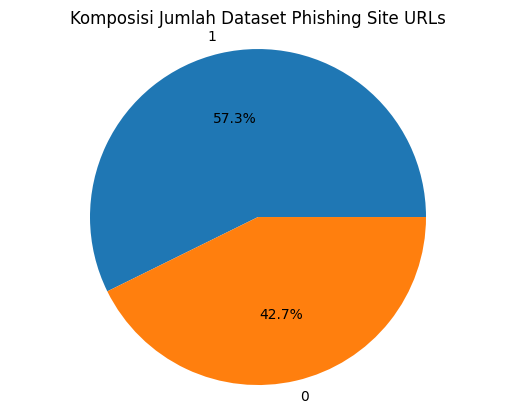

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data2, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
# Memilih hanya kolom 'url' dan 'label'
data2_new = data2[['URL', 'Label']]

In [ ]:
data2_new

,URL,Label
0,https://www.southbankmosaics.com,1
1,https://www.uni-mainz.de,1
2,https://www.voicefmradio.co.uk,1
3,https://www.sfnmjournal.com,1
4,https://www.rewildingargentina.org,1
...,...,...
235790,https://www.skincareliving.com,1
235791,https://www.winchester.gov.uk,1
235792,https://www.nononsensedesign.be,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0


##Combine

In [ ]:
# Gabungkan semuanya
combined_all = pd.concat([data1_new, data2_new])

In [ ]:
combined_all

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
235790,https://www.skincareliving.com,1
235791,https://www.winchester.gov.uk,1
235792,https://www.nononsensedesign.be,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0


In [ ]:
combined_all.duplicated().sum()

0

In [ ]:
combined_all['Label'].unique()

array([1, 0])

In [ ]:
print('Total Jumlah url:', combined_all.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Phishing\t\t:', combined_all[combined_all.Label == 1].shape[0], 'data')
print('-- [0] Good\t\t:', combined_all[combined_all.Label == 0].shape[0], 'data\n')

Total Jumlah url: 853314 data

terdiri dari (label):
-- [1] Phishing		: 402133 data
-- [0] Good		: 451181 data



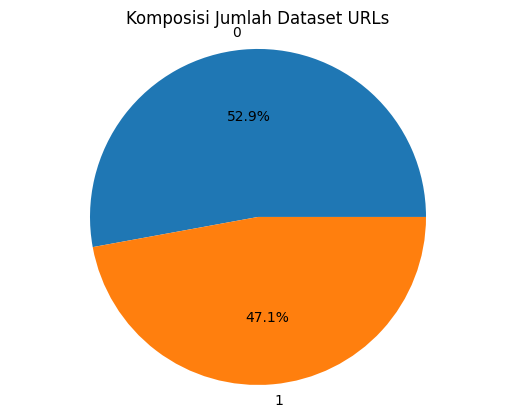

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(combined_all, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

## Tokenisasi

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
# Tokenizing all the rows
print('Getting words tokenized ...')
t0= time.perf_counter()
combined_all['text_tokenized'] = combined_all.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 6.70037783799998 sec


In [ ]:
combined_all.sample(5)

,URL,Label,text_tokenized
627131,https://pub-c703dadea8164d9790f4641e531245a0.r...,1,"[https, pub, c, dadea, d, f, e, a, r, dev, kil..."
304829,news.bbc.co.uk/sport2/hi/motorsport/formula_on...,0,"[news, bbc, co, uk, sport, hi, motorsport, for..."
459364,linkedin.com/in/johnsmithceo,0,"[linkedin, com, in, johnsmithceo]"
207864,cococreations.com.au/album,1,"[cococreations, com, au, album]"
598357,https://att-106838.weeblysite.com/,1,"[https, att, weeblysite, com]"


In [ ]:
combined_all.text_tokenized[598357]

['https', 'att', 'weeblysite', 'com']

## Stemming

In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
combined_all['text_stemmed'] = combined_all['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 46.21276228800002 sec


In [ ]:
combined_all.sample(5)

,URL,Label,text_tokenized,text_stemmed
565262,xfinitytv.comcast.net/movies/Mission:-Impossib...,0,"[xfinitytv, comcast, net, movies, Mission, Imp...","[xfinitytv, comcast, net, movi, mission, impos..."
172126,http://datool.org/games/mobile%20legends.html,0,"[http, datool, org, games, mobile, legends, html]","[http, datool, org, game, mobil, legend, html]"
182584,https://www.burbvus.com,1,"[https, www, burbvus, com]","[https, www, burbvus, com]"
531591,timessquaregossip.com/2007/08/singer-shayne-wa...,0,"[timessquaregossip, com, singer, shayne, ward,...","[timessquaregossip, com, singer, shayn, ward, ..."
277454,gerryjr.com/,0,"[gerryjr, com]","[gerryjr, com]"


In [ ]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
combined_all['text_sent'] = combined_all['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.28753268600002 sec


In [ ]:
bad_sites = combined_all[combined_all.Label == 0]
good_sites = combined_all[combined_all.Label == 1]

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
93808,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0,"[https, pogodasub, com, Ge, I, rd, Ly, I, Se, ...","[https, pogodasub, com, ge, i, rd, ly, i, se, ...",https pogodasub com ge i rd ly i se ipko login...
93809,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0,"[https, pogodasub, com, Ge, I, rd, hz, hZnA]","[https, pogodasub, com, ge, i, rd, hz, hzna]",https pogodasub com ge i rd hz hzna
93810,https://resicorphome.com/brian/srr/austin/,0,"[https, resicorphome, com, brian, srr, austin]","[https, resicorphom, com, brian, srr, austin]",https resicorphom com brian srr austin
93811,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0,"[https, kurier, oplata, com, PzVxLK, l, WdJslU...","[https, kurier, oplata, com, pzvxlk, l, wdjslu...",https kurier oplata com pzvxlk l wdjsludi inte...
93812,https://kurier24-oplata.com/PzVxLK7l/3l0C88s4-...,0,"[https, kurier, oplata, com, PzVxLK, l, l, C, ...","[https, kurier, oplata, com, pzvxlk, l, l, c, ...",https kurier oplata com pzvxlk l l c s ipko lo...


In [ ]:
combined_all.text_stemmed[598357]

['https', 'att', 'weeblysit', 'com']

In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1,"[signin, eby, de, zukruygxctzmmqi, civpro, co,...","[signin, ebi, de, zukruygxctzmmqi, civpro, co,...",signin ebi de zukruygxctzmmqi civpro co za
1,http://www.marketingbyinternet.com/mo/e56508df...,1,"[http, www, marketingbyinternet, com, mo, e, d...","[http, www, marketingbyinternet, com, mo, e, d...",http www marketingbyinternet com mo e df f ce ...
2,https://docs.google.com/spreadsheet/viewform?f...,1,"[https, docs, google, com, spreadsheet, viewfo...","[https, doc, googl, com, spreadsheet, viewform...",https doc googl com spreadsheet viewform formk...
3,retajconsultancy.com,1,"[retajconsultancy, com]","[retajconsult, com]",retajconsult com
4,alexpay2.beget.tech,1,"[alexpay, beget, tech]","[alexpay, beget, tech]",alexpay beget tech


In [ ]:
combined_all.head()

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1


## Ekstraksi fitur menjadi sebuah matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(combined_all.text_sent) #transform all text which we tokenize and stemed

In [ ]:
print(list(cv.vocabulary_)[:10])

['signin', 'ebi', 'de', 'zukruygxctzmmqi', 'civpro', 'co', 'za', 'http', 'www', 'marketingbyinternet']


In [ ]:
feature[598357].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(feature[598357].toarray())

[[0 0 0 ... 0 0 0]]


In [ ]:
with open('feature.pickle', 'wb') as output:
  pickle.dump(feature, output)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def train_test_model(model, X, y, training_percentage) :
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=1-training_percentage, stratify=y, random_state=42)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    precision = precision_score(testY, predY, pos_label=1)
    recall = recall_score(testY, predY, pos_label=1)
    f1 = f1_score(testY, predY, pos_label=1)
    return accuracy, precision, recall, f1

In [ ]:
training_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
def model_results(model) :
    results = []
    for p in training_sizes :
        results.append(train_test_model(model, feature, combined_all.Label, p))
    return pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1Score'])

In [ ]:
logreg_results = model_results(logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
models = ['Logistic Regression']
model_results = [logreg_results]

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
for model in model_results :
    accuracies.append(model.Accuracy.values)
    precisions.append(model.Precision.values)
    recalls.append(model.Recall.values)
    f1_scores.append(model.F1Score.values)

In [ ]:
accuracies = pd.DataFrame(np.transpose(accuracies), columns=models, index=training_sizes*100)
precisions = pd.DataFrame(np.transpose(precisions), columns=models, index=training_sizes*100)
recalls = pd.DataFrame(np.transpose(recalls), columns=models, index=training_sizes*100)
f1_scores = pd.DataFrame(np.transpose(f1_scores), columns=models, index=training_sizes*100)

In [ ]:
accuracies

,Logistic Regression
10.0,0.886930
20.0,0.894381
30.0,0.898405
40.0,0.900779
50.0,0.902416
60.0,0.901722
70.0,0.901451
80.0,0.901953
90.0,0.902440


In [ ]:
precisions

,Logistic Regression
10.0,0.896814
20.0,0.903898
30.0,0.909180
40.0,0.908991
50.0,0.912173
60.0,0.915621
70.0,0.909592
80.0,0.910558
90.0,0.908571


In [ ]:
recalls

,Logistic Regression
10.0,0.858891
20.0,0.868184
30.0,0.871471
40.0,0.877292
50.0,0.877409
60.0,0.871796
70.0,0.878166
80.0,0.878213
90.0,0.881708


In [ ]:
f1_scores

,Logistic Regression
10.0,0.877443
20.0,0.885682
30.0,0.889926
40.0,0.892860
50.0,0.894454
60.0,0.893171
70.0,0.893603
80.0,0.894093
90.0,0.894938


Text(0, 0.5, 'Accuracies')

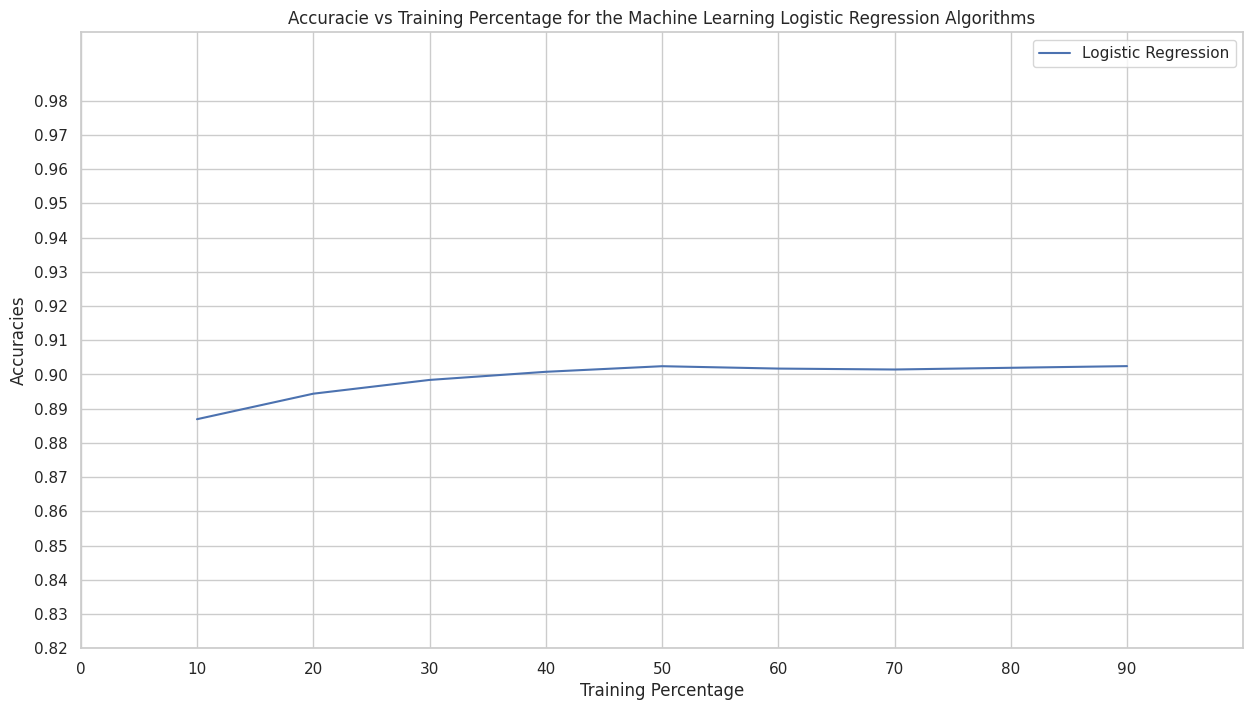

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = accuracies)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("Accuracie vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Accuracies")

Text(0, 0.5, 'Precisions')

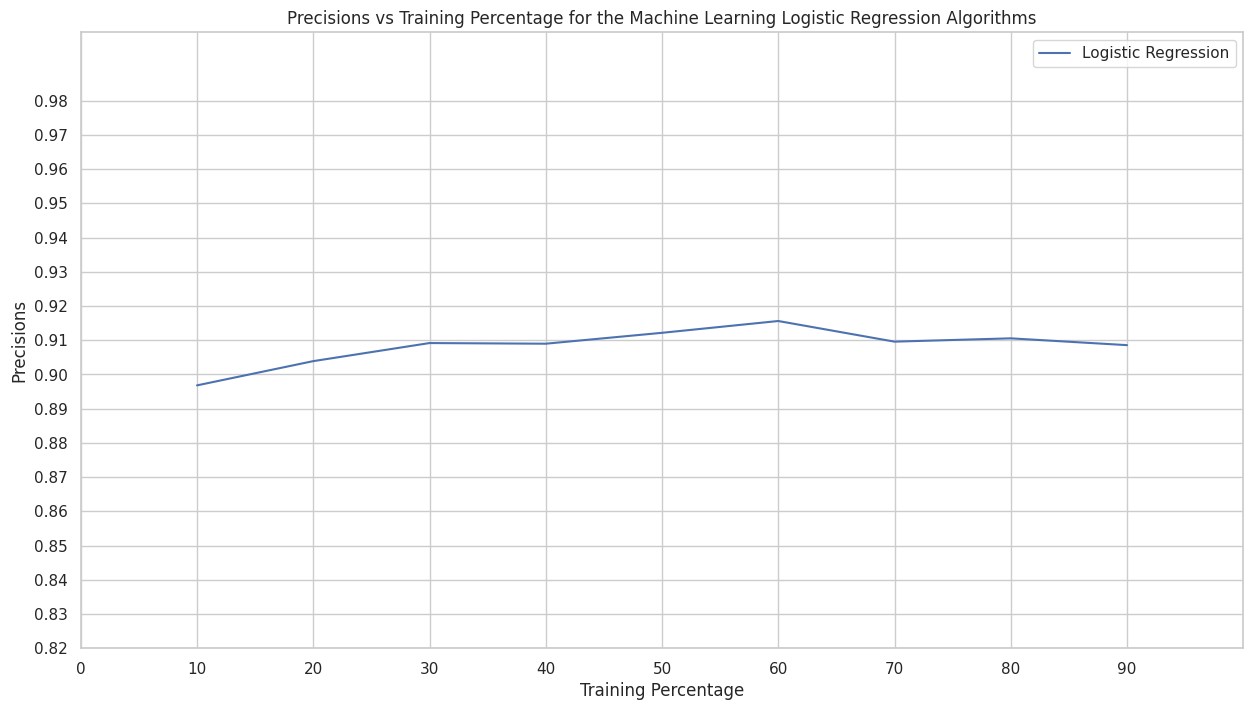

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = precisions)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("Precisions vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Precisions")

Text(0, 0.5, 'Recall')

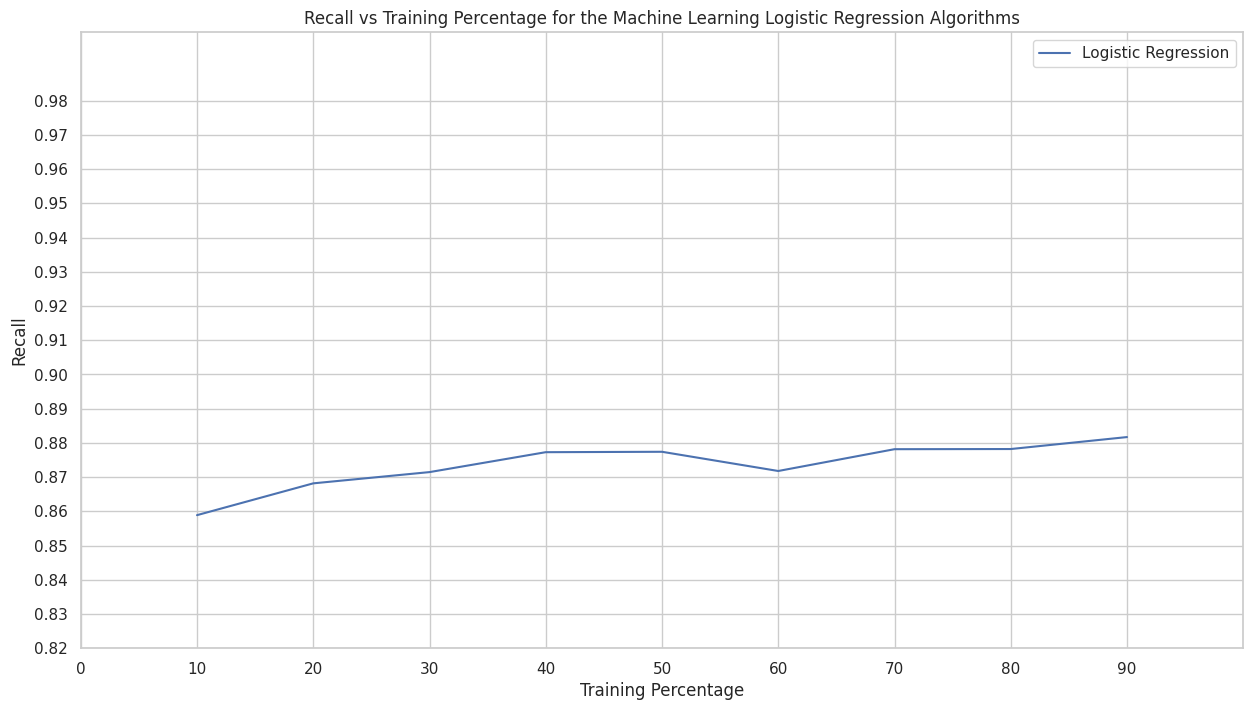

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = recalls)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("Recall vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Recall")

Text(0, 0.5, 'F1-Score')

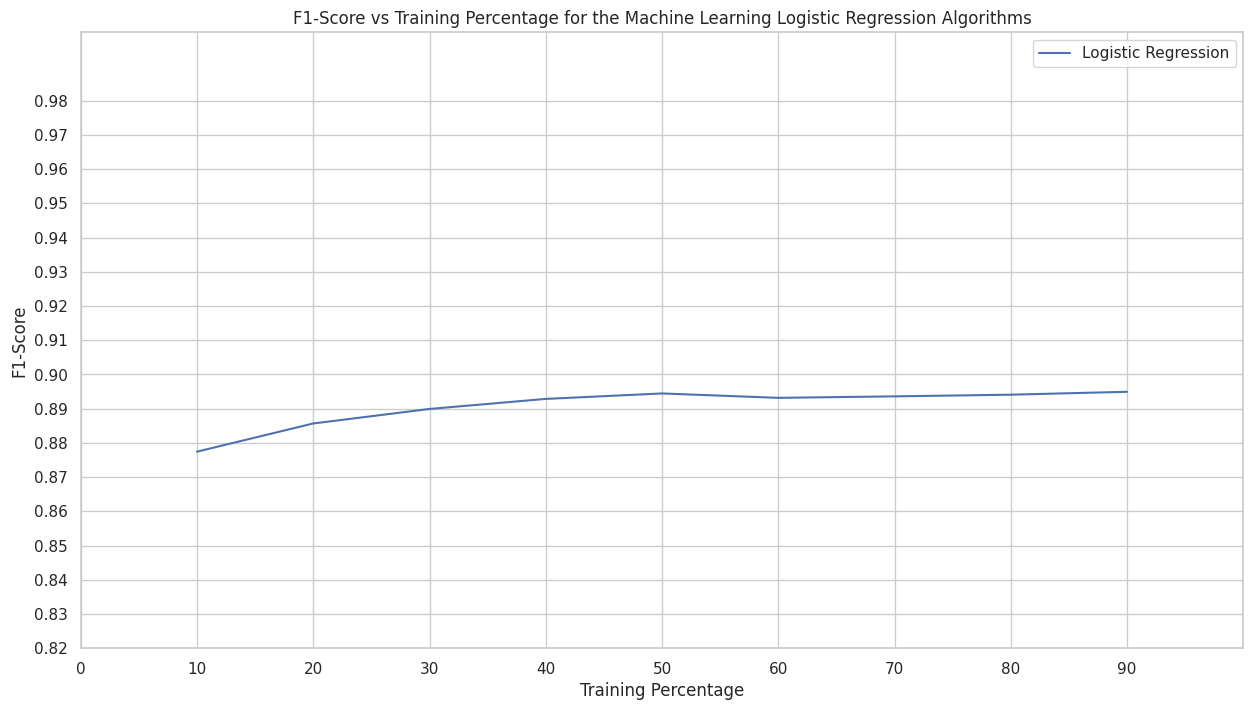

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = f1_scores)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("F1-Score vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("F1-Score")

### Make Sklearn Pipeline Using Logistic Regression

In [ ]:
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Inisialisasi tokenizer dan stemmer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer('english')

# Fungsi untuk melakukan stemming pada setiap kata dalam teks
def stem_tokens(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

# Fungsi untuk melakukan tokenisasi dan stemming pada teks
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return stem_tokens(tokens, stemmer)

# Membuat pipeline dengan CountVectorizer dan LogisticRegression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer=tokenize), LogisticRegression())

In [ ]:
trainX, testX, trainY, testY = train_test_split(combined_all.URL, combined_all.Label, test_size=0.2, random_state=42)

In [ ]:
trainX.shape

(682651,)

In [ ]:
data_train_bad = trainY[trainY== 1]
data_train_bad.shape

(321480,)

In [ ]:
data_train_good = trainY[trainY== 0]
data_train_good.shape

(361171,)

In [ ]:
testX.shape

(170663,)

In [ ]:
data_train_good = testY[testY== 0]
data_train_good.shape

(90010,)

In [ ]:
data_train_bad = testY[testY== 1]
data_train_bad.shape

(80653,)

In [ ]:
pipeline_ls.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function tokenize at 0x7ee04b5f7c70>)),
                ('logisticregression', LogisticRegression())])

Training Accuracy : 0.9217652944183777
Testing Accuracy : 0.9041854414840944

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.93      0.90      0.91     93024
           0       0.88      0.91      0.90     77639

    accuracy                           0.90    170663
   macro avg       0.90      0.91      0.90    170663
weighted avg       0.90      0.90      0.90    170663


CONFUSION MATRIX


<Axes: >

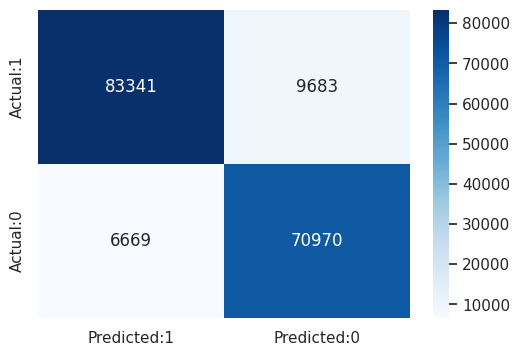

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:1', 'Predicted:0'],
            index = ['Actual:1', 'Actual:0'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['1','0']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g',cmap="Blues")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(pipeline_ls, combined_all.URL, combined_all.Label, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.3f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed t

Hasil K-Fold Cross Validation:
Akurasi: 94.513%


### Save Model Logistic Regression

In [ ]:
joblib.dump((pipeline_ls), "model_phishing_lr.model")

['model_phishing_lr.model']

In [ ]:
# from joblib import load
from joblib import load
loaded_model = load('model_phishing_lr.model')
result = loaded_model.score(testX,testY)
print(result)

0.9041854414840944


## Try to Predict

In [ ]:
predict_0 = ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.kominfo.go.id/content/detail/29633/siaran-pers-no-118hmkominfo092020-tentang-waspada-kejahatan-siber-kominfo-imbau-jangan-bagikan-kode-rahasiaotp-fraud/0/siaran_pers'
]

predict_1 = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
loaded_model = joblib.load('model_phishing_lr.model')

result_1 = loaded_model.predict(predict_1)
result_0 = loaded_model.predict(predict_0)

print(result_1)
print("*"*9)
print(result_0)


[1 0 0 1 0 0 1 0 0 1]
*********
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
from joblib import load
loaded_model = load('model_phishing_lr.model')

predict_bad = []
predict_good = []


while True:
    url = input("Masukkan URL (atau tekan Enter untuk keluar): ")
    if not url:
        break

    import pickle

    result = loaded_model.predict([url])
    print(result)

Masukkan URL (atau tekan Enter untuk keluar): https://sfr-suivi-client.com/login.php
[1]
Masukkan URL (atau tekan Enter untuk keluar): http://sfr-suivi-client.com/
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://sandiko.space/pl/millenium/login/
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://ctem.communityocean.eu/ff
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://brt.bruschetteriabologna.it/auth/wd=brt...
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://zkj4s.app.link/e/84Gw4GGK8Hb
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://aruustali.com/Ar/areautenti/login.php
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://atualizacao.atucad.com/caixatem.php
[1]
Masukkan URL (atau tekan Enter untuk keluar): http://shopeecncb.com
[0]
Masukkan URL (atau tekan Enter untuk keluar): https://colab.research.google.com/drive/1jm9nHuJor4sn3LBD8a9JmeqSGsXWbr5T#scrollTo=165b707f
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://3sxpeqr41v

## Word Cloud

In [ ]:
pip install wordcloud

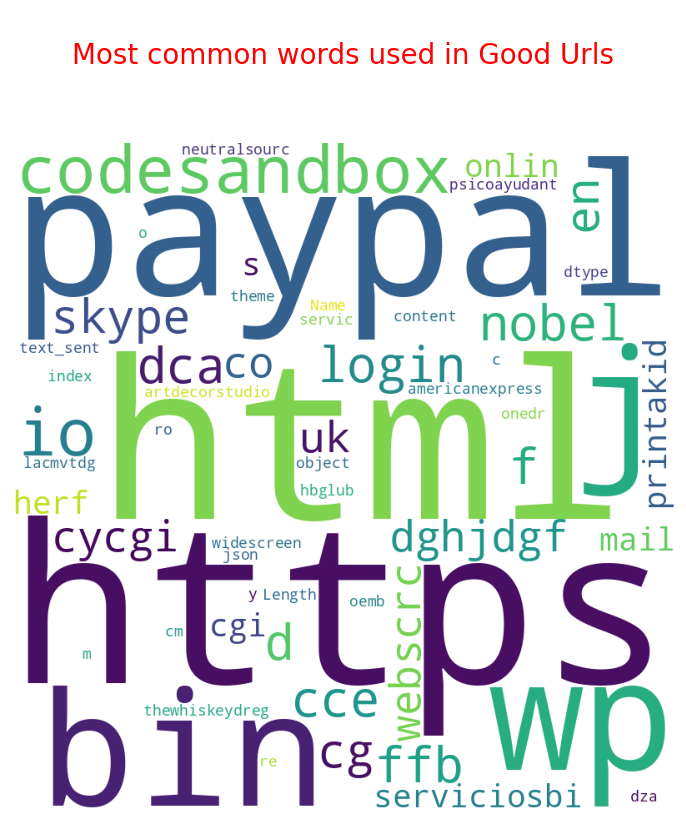

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator

combined_1_2_5_6 = good_sites.text_sent
combined_1_2_5_6.reset_index(drop=True, inplace=True)
text = str(combined_1_2_5_6)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', max_words = 400, min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("\nMost common words used in Good Urls\n\n", fontdict={'size': 20, 'color': 'red', 'verticalalignment': 'bottom'})
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

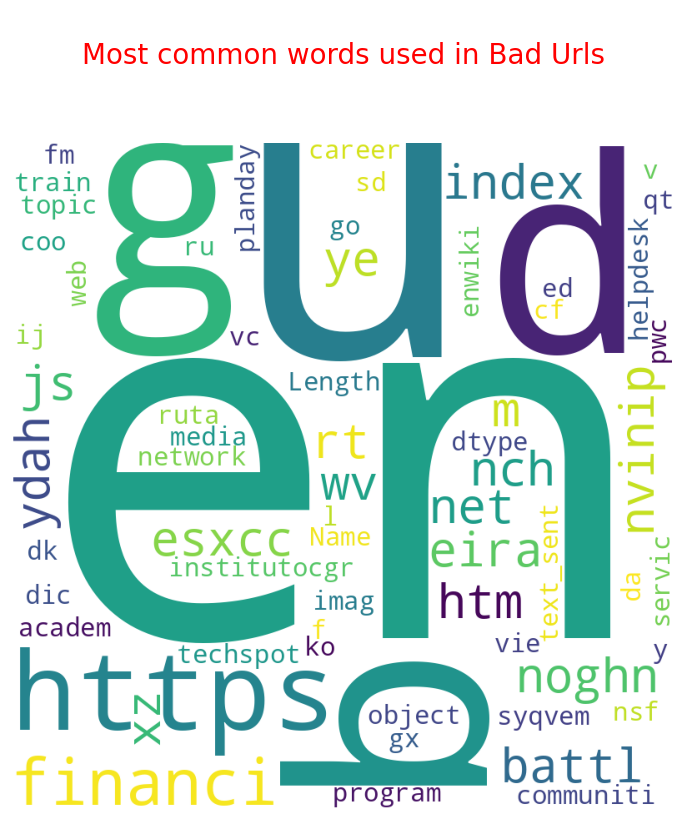

In [ ]:
combined_1_2_5_6 = bad_sites.text_sent
combined_1_2_5_6.reset_index(drop=True, inplace=True)
text = str(combined_1_2_5_6)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', max_words = 400, min_font_size = 10).generate(text)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("\nMost common words used in Bad Urls\n\n", fontdict={'size': 20, 'color': 'red', 'verticalalignment': 'bottom'})
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()